In [1]:
# Skin Cancer Dataset Preprocessing

# Import the libraries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import shutil

Using TensorFlow backend.


In [2]:
# Create a new directory for the images
base_dir = 'base_dir'
os.mkdir(base_dir)

In [3]:
# Training file directory
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

In [4]:
# Validation file directory
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

In [5]:
# Create new folders in the training directory for each of the classes
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [6]:
# Create new folders in the validation directory for each of the classes
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [7]:
# Read the metadata
df = pd.read_csv('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/HAM10000_metadata.csv')

In [8]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [9]:
# Set y as the labels
y = df['dx']

In [10]:
# Split the metadata into training and validation
df_train, df_val = train_test_split(df, test_size=0.1, random_state=101, stratify=y)

In [11]:
df_train.head()

lesion_id      image_id     dx    dx_type   age     sex  \
1043  HAM_0000089  ISIC_0026783    bkl  consensus  75.0    male   
7953  HAM_0002519  ISIC_0033109     nv      histo  45.0  female   
9829  HAM_0003939  ISIC_0027172  akiec      histo  75.0    male   
5550  HAM_0003855  ISIC_0028801     nv  follow_up  50.0    male   
866   HAM_0006186  ISIC_0029427    bkl  consensus   0.0    male   

         localization  
1043             face  
7953          abdomen  
9829             face  
5550          abdomen  
866   lower extremity

In [12]:
# Print the shape of the training and validation split
print(df_train.shape)
print(df_val.shape)

(9013, 7)
(1002, 7)


In [13]:
# Find the number of values in the training and validation set
df_train['dx'].value_counts()
df_val['dx'].value_counts()

nv       671
mel      111
bkl      110
bcc       51
akiec     33
vasc      14
df        12
Name: dx, dtype: int64

In [14]:
# Transfer the images into folders
# Set the image id as the index
df.set_index('image_id', inplace=True)

In [15]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part1')
folder_2 = os.listdir('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part2')

In [16]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

In [17]:
# Transfer the training images
for image in train_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [18]:
# Transfer the validation images
for image in val_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/images_part2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [19]:
# Check how many training images are in each folder
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6034
1002
989
463
294
128
103


In [20]:
# Check how many validation images are in each folder
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

671
111
110
51
33
14
12


In [21]:
# Augment the data
# Class 'nv' is not going to be augmented
class_list = ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [22]:
for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('base_dir/train_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 6000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 1002 images belonging to 1 classes.
Found 989 images belonging to 1 classes.
Found 463 images belonging to 1 classes.
Found 294 images belonging to 1 classes.
Found 128 images belonging to 1 classes.
Found 103 images belonging to 1 classes.


In [23]:
# Check how many train images are each folder (original + augmented)
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6034
5810
5984
5606
5930
5170
4170


In [24]:
# Check how many validation images are in each folder
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

671
111
110
51
33
14
12


### Training the model

In [25]:
# The model for the skin cancer classifier

# Import the libraries
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
# The paths for the training and validation images
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

In [27]:
# Declare a few useful values
num_train_samples = 9013
num_val_samples = 1002
train_batch_size = 10
val_batch_size = 10
image_size = 224

In [28]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [29]:
# Set up generators
train_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=train_batch_size)

valid_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=val_batch_size)

test_batches = ImageDataGenerator(
    preprocessing_function= \
        keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=val_batch_size,
    shuffle=False)

Found 38704 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


In [30]:
# Create a MobileNet model
mobile = keras.applications.mobilenet.MobileNet()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
# See a summary of the layers in the model
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [32]:
# Modify the model
# Exclude the last 5 layers of the model
x = mobile.layers[-6].output
# Add a dropout and dense layer for predictions
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

In [33]:
# Create a new model with the new outputs
model = Model(inputs=mobile.input, outputs=predictions)

In [34]:
# See a summary of the new layers in the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [35]:
# Freeze the weights of the layers that we aren't training (training the last 23)
for layer in model.layers[:-23]:
    layer.trainable = False

In [36]:
# Train the model
# Define Top2 and Top3 Accuracy
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

In [37]:
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [38]:
# Compile the model
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [39]:
# Add weights to make the model more sensitive to melanoma
class_weights={
    0: 1.0,  # akiec
    1: 1.0,  # bcc
    2: 1.0,  # bkl
    3: 1.0,  # df
    4: 3.0,  # mel
    5: 1.0,  # nv
    6: 1.0,  # vasc
}

In [40]:
# Declare the filepath for the saved model
filepath = "model_diagnosify.h5"

In [41]:
# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1,
                             save_best_only=True, mode='max')


In [42]:
# Reduce the learning rate as the learning stagnates
reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

In [43]:
callbacks_list = [checkpoint, reduce_lr]

In [44]:
# Fit the model
history = model.fit_generator(train_batches,
                              steps_per_epoch=train_steps,
                              class_weight=class_weights,
                              validation_data=valid_batches,
                              validation_steps=val_steps,
                              epochs=10,
                              verbose=1,
                              callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
902/902 [==============================] - 4138s 5s/step - loss: 2.2899 - categorical_accuracy: 0.4947 - top_2_accuracy: 0.6930 - top_3_accuracy: 0.8183 - val_loss: 1.1620 - val_categorical_accuracy: 0.6238 - val_top_2_accuracy: 0.7615 - val_top_3_accuracy: 0.8403

Epoch 00001: val_top_3_accuracy improved from -inf to 0.84032, saving model to model_diagnosify.h5
Epoch 2/10
902/902 [==============================] - 3989s 4s/step - loss: 1.2746 - categorical_accuracy: 0.6115 - top_2_accuracy: 0.8112 - top_3_accuracy: 0.9156 - val_loss: 1.2882 - val_categorical_accuracy: 0.6816 - val_top_2_accuracy: 0.8313 - val_top_3_accuracy: 0.9132

Epoch 00002: val_top_3_accuracy improved from 0.84032 to 0.91317, saving model to model_diagnosify.h5
Epoch 3/10
902/902 [==============================] - 3544s 4s/step - loss: 1.1724 - categorical_accuracy: 0.6421 - top_2_accuracy: 0.8371 - top_3_accu

In [45]:
# Evaluate the model
# Evaluation of the last epoch
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

val_loss: 0.7532354337823188
val_cat_acc: 0.7405189571682802
val_top_2_acc: 0.8952095784588964
val_top_3_acc: 0.953093807735367


In [46]:
# Evaluation of the best epoch
model.load_weights('model_diagnosify.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

val_loss: 0.7532354337823188
val_cat_acc: 0.7405189571682802
val_top_2_acc: 0.8952095784588964
val_top_3_acc: 0.953093807735367


In [47]:
# Create a confusion matrix of the test images
test_labels = test_batches.classes

In [48]:
# Make predictions
predictions = model.predict_generator(test_batches, steps=val_steps, verbose=1)

101/101 [==============================] - 321s 3s/step


Confusion matrix, without normalization
[[ 22   5   4   0   1   1   0]
 [  7  37   0   0   2   5   0]
 [ 11  11  34   2  13  39   0]
 [  2   1   0   8   0   1   0]
 [  9   4   3   5  39  51   0]
 [  6  21  12  10  30 591   1]
 [  0   0   0   0   0   3  11]]


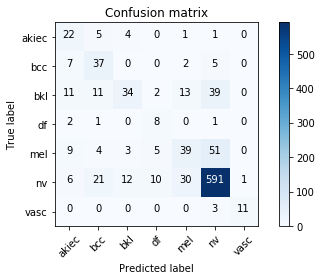

In [49]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels)

In [52]:
#Trying to predict an image
from keras.models import load_model
from keras.preprocessing import image

#load the model we saved
#model = load_model('model_diagnosify.h5')

test_image= image.load_img('C:/Users/USER/Desktop/Data Visualisation/Skin_Cancer_Project/base_dir/val_dir/nv/ISIC_0031820.jpg',target_size = (28,28,3))


test_image = image.img_to_array(test_image)
print(test_image.dtype)
print(test_image.shape)

test_image = np.expand_dims(test_image, axis = 0)
#result = filepath.predict(test_image)
print (test_image)

float32
(28, 28, 3)
[[[[223. 146. 162.]
   [221. 146. 167.]
   [226. 152. 167.]
   ...
   [226. 151. 171.]
   [228. 152. 178.]
   [223. 148. 168.]]

  [[224. 154. 162.]
   [222. 149. 166.]
   [226. 150. 163.]
   ...
   [226. 148. 170.]
   [228. 159. 178.]
   [215. 141. 158.]]

  [[219. 141. 157.]
   [227. 149. 162.]
   [226. 149. 167.]
   ...
   [223. 154. 173.]
   [227. 156. 174.]
   [221. 148. 168.]]

  ...

  [[215. 145. 153.]
   [219. 159. 159.]
   [221. 149. 152.]
   ...
   [212. 140. 152.]
   [212. 141. 149.]
   [213. 142. 150.]]

  [[216. 155. 160.]
   [215. 160. 165.]
   [213. 143. 145.]
   ...
   [213. 139. 154.]
   [218. 144. 157.]
   [211. 138. 147.]]

  [[214. 155. 157.]
   [215. 152. 145.]
   [219. 149. 151.]
   ...
   [212. 142. 150.]
   [204. 132. 144.]
   [205. 131. 146.]]]]
